# Task1:-
### Creating a linear model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms 

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

In [36]:
sales_price = pd.read_csv(r"sample_submission.csv")

In [37]:
sales_price

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [38]:
data = pd.read_csv(r"test.csv")

In [39]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [40]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [41]:
final_data = data.drop(columns= ["MSSubClass", "MSZoning" , "LotFrontage", 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenAbvGr', 'KitchenQual','Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars','GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', "TotRmsAbvGrd"], axis=1)

In [42]:
final_data

,Id,LotArea,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,GarageArea
0,1461,11622,896,0,0,896,0.0,0.0,1,0,2,730.0
1,1462,14267,1329,0,0,1329,0.0,0.0,1,1,3,312.0
2,1463,13830,928,701,0,1629,0.0,0.0,2,1,3,482.0
3,1464,9978,926,678,0,1604,0.0,0.0,2,1,3,470.0
4,1465,5005,1280,0,0,1280,0.0,0.0,2,0,2,506.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,1936,546,546,0,1092,0.0,0.0,1,1,3,0.0
1455,2916,1894,546,546,0,1092,0.0,0.0,1,1,3,286.0
1456,2917,20000,1224,0,0,1224,1.0,0.0,1,0,4,576.0
1457,2918,10441,970,0,0,970,0.0,1.0,1,0,3,0.0


In [43]:
final_data.columns

Index(['Id', 'LotArea', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'GarageArea'],
      dtype='object')

In [44]:
final_data.isna().count()

Id              1459
LotArea         1459
1stFlrSF        1459
2ndFlrSF        1459
LowQualFinSF    1459
GrLivArea       1459
BsmtFullBath    1459
BsmtHalfBath    1459
FullBath        1459
HalfBath        1459
BedroomAbvGr    1459
GarageArea      1459
dtype: int64

In [45]:
rows_with_na = final_data[final_data.isna().any(axis=1)]
rows_with_na

,Id,LotArea,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,GarageArea
660,2121,5940,896,0,0,896,NaN,NaN,1,0,2,280.0
728,2189,47007,3820,0,0,3820,NaN,NaN,3,1,5,624.0
1116,2577,9060,942,886,0,1828,0.0,0.0,2,0,3,NaN


In [46]:
final_data = final_data.fillna(value= 0)

In [47]:
final_data.isna().sum()

Id              0
LotArea         0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
GarageArea      0
dtype: int64

In [48]:
final_data

,Id,LotArea,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,GarageArea
0,1461,11622,896,0,0,896,0.0,0.0,1,0,2,730.0
1,1462,14267,1329,0,0,1329,0.0,0.0,1,1,3,312.0
2,1463,13830,928,701,0,1629,0.0,0.0,2,1,3,482.0
3,1464,9978,926,678,0,1604,0.0,0.0,2,1,3,470.0
4,1465,5005,1280,0,0,1280,0.0,0.0,2,0,2,506.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,1936,546,546,0,1092,0.0,0.0,1,1,3,0.0
1455,2916,1894,546,546,0,1092,0.0,0.0,1,1,3,286.0
1456,2917,20000,1224,0,0,1224,1.0,0.0,1,0,4,576.0
1457,2918,10441,970,0,0,970,0.0,1.0,1,0,3,0.0


In [49]:
merged_final_data = pd.merge(final_data, sales_price , on= 'Id', how= 'inner')

In [50]:
merged_final_data

,Id,LotArea,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,GarageArea,SalePrice
0,1461,11622,896,0,0,896,0.0,0.0,1,0,2,730.0,169277.052498
1,1462,14267,1329,0,0,1329,0.0,0.0,1,1,3,312.0,187758.393989
2,1463,13830,928,701,0,1629,0.0,0.0,2,1,3,482.0,183583.683570
3,1464,9978,926,678,0,1604,0.0,0.0,2,1,3,470.0,179317.477511
4,1465,5005,1280,0,0,1280,0.0,0.0,2,0,2,506.0,150730.079977
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,1936,546,546,0,1092,0.0,0.0,1,1,3,0.0,167081.220949
1455,2916,1894,546,546,0,1092,0.0,0.0,1,1,3,286.0,164788.778231
1456,2917,20000,1224,0,0,1224,1.0,0.0,1,0,4,576.0,219222.423400
1457,2918,10441,970,0,0,970,0.0,1.0,1,0,3,0.0,184924.279659


In [51]:
merged_final_data.isna().sum()

Id              0
LotArea         0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
GarageArea      0
SalePrice       0
dtype: int64

In [52]:
merged_final_data = merged_final_data.drop("Id", axis=1)

In [53]:
merged_final_data.columns

Index(['LotArea', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'GarageArea', 'SalePrice'],
      dtype='object')

In [54]:
merged_final_data

,LotArea,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,GarageArea,SalePrice
0,11622,896,0,0,896,0.0,0.0,1,0,2,730.0,169277.052498
1,14267,1329,0,0,1329,0.0,0.0,1,1,3,312.0,187758.393989
2,13830,928,701,0,1629,0.0,0.0,2,1,3,482.0,183583.683570
3,9978,926,678,0,1604,0.0,0.0,2,1,3,470.0,179317.477511
4,5005,1280,0,0,1280,0.0,0.0,2,0,2,506.0,150730.079977
...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1936,546,546,0,1092,0.0,0.0,1,1,3,0.0,167081.220949
1455,1894,546,546,0,1092,0.0,0.0,1,1,3,286.0,164788.778231
1456,20000,1224,0,0,1224,1.0,0.0,1,0,4,576.0,219222.423400
1457,10441,970,0,0,970,0.0,1.0,1,0,3,0.0,184924.279659


In [55]:
'''feat = ['LotArea', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'GarageArea', 'SalePrice']
scal = StandardScaler()

merged_final_data[feat] = scal.fit_transform(merged_final_data[feat])
'''
feat = ['LotArea', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'GarageArea', 'SalePrice']    
scal = MinMaxScaler()

merged_final_data[feat] = scal.fit_transform(merged_final_data[feat])   

In [56]:
merged_final_data

,LotArea,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,GarageArea,SalePrice
0,0.184147,0.104309,0.000000,0.0,0.104309,0.000000,0.0,0.25,0.0,0.333333,0.490591,0.229797
1,0.232124,0.196672,0.000000,0.0,0.196672,0.000000,0.0,0.25,0.5,0.500000,0.209677,0.356475
2,0.224197,0.111135,0.376477,0.0,0.260666,0.000000,0.0,0.50,0.5,0.500000,0.323925,0.327860
3,0.154326,0.110708,0.364125,0.0,0.255333,0.000000,0.0,0.50,0.5,0.500000,0.315860,0.298618
4,0.064121,0.186220,0.000000,0.0,0.186220,0.000000,0.0,0.50,0.0,0.333333,0.340054,0.102670
...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.008453,0.029650,0.293233,0.0,0.146118,0.000000,0.0,0.25,0.5,0.500000,0.000000,0.214746
1455,0.007691,0.029650,0.293233,0.0,0.146118,0.000000,0.0,0.25,0.5,0.500000,0.192204,0.199033
1456,0.336115,0.174275,0.000000,0.0,0.174275,0.333333,0.0,0.25,0.0,0.666667,0.387097,0.572141
1457,0.162724,0.120094,0.000000,0.0,0.120094,0.000000,0.5,0.25,0.0,0.500000,0.000000,0.337049


In [57]:
x = merged_final_data.drop("SalePrice", axis=1)
y = merged_final_data["SalePrice"]

In [58]:
x

,LotArea,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,GarageArea
0,0.184147,0.104309,0.000000,0.0,0.104309,0.000000,0.0,0.25,0.0,0.333333,0.490591
1,0.232124,0.196672,0.000000,0.0,0.196672,0.000000,0.0,0.25,0.5,0.500000,0.209677
2,0.224197,0.111135,0.376477,0.0,0.260666,0.000000,0.0,0.50,0.5,0.500000,0.323925
3,0.154326,0.110708,0.364125,0.0,0.255333,0.000000,0.0,0.50,0.5,0.500000,0.315860
4,0.064121,0.186220,0.000000,0.0,0.186220,0.000000,0.0,0.50,0.0,0.333333,0.340054
...,...,...,...,...,...,...,...,...,...,...,...
1454,0.008453,0.029650,0.293233,0.0,0.146118,0.000000,0.0,0.25,0.5,0.500000,0.000000
1455,0.007691,0.029650,0.293233,0.0,0.146118,0.000000,0.0,0.25,0.5,0.500000,0.192204
1456,0.336115,0.174275,0.000000,0.0,0.174275,0.333333,0.0,0.25,0.0,0.666667,0.387097
1457,0.162724,0.120094,0.000000,0.0,0.120094,0.000000,0.5,0.25,0.0,0.500000,0.000000


In [59]:
y

0       0.229797
1       0.356475
2       0.327860
3       0.298618
4       0.102670
          ...   
1454    0.214746
1455    0.199033
1456    0.572141
1457    0.337049
1458    0.356362
Name: SalePrice, Length: 1459, dtype: float64

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 42)

In [61]:
linear_model = LinearRegression()

linear_model.fit(x_train, y_train)

LinearRegression()

In [65]:
y_pred = linear_model.predict(x_test)
len(y_pred)

292

In [67]:
score = linear_model.score(x_test, y_test)

In [68]:
score

0.9549020713247315

Text(0.5, 1.0, 'Score of the model:- 95.4%')

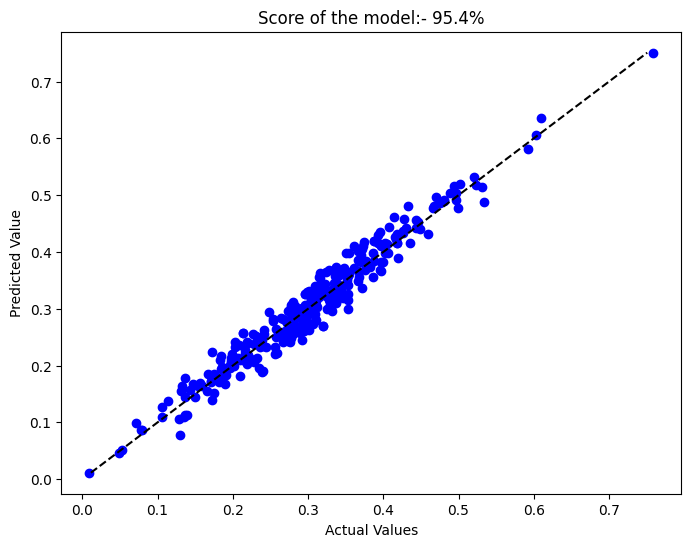

In [74]:
plt.figure(figsize= (8,6))
plt.scatter(y_pred, y_test, color = "blue" , label = "Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Value")
plt.title("Score of the model:- 95.4%")